In [1]:
#Imports
from implementation import Node, format_dataframe, training_test_split
from implementation import accuracy, printTree, visualise_splits, visualise_best_feature
import os
from sklearn import tree
from sklearn.metrics import accuracy_score

## Steps to run the algorithm:

1. Data must be provided in .csv format. Use format_dataframe() to get data in correct format for the algorithm. The first argument specifies the .csv file and the second argument specifies the label column name.
2. Create a Node object to create the tree structure. The first argument is the Root dataframe. Other arguments that can be included are max_depth, criterion.
3. accuracy function can be used to test the performance on a test dataset. 

In [2]:
# Format dataframe
X = format_dataframe("wildfires.csv", "yes")
# Train/Test Splitting
X1, Test = training_test_split(X, 0.6666)
# Create the Tree
Root = Node(X1, max_depth=6,criterion= "ent")
# Print the accuracy
print("{}%".format(round(accuracy(Test, Root), 2)))

82.61%


## Accessing nodes and their information:

Each node has a series of information stored which can be accessed using class methods:

- df method : Returns dataframe at that node
- key : returns which segment of the parents split that the current node belongs too
- feat : retursn the best feature by which to split the current node
- threshold : for numerical feature splits, returns the splitting threshold
- end : returns True for leaf nodes, False otherwise

Traversing the tree can be done using the __.under__ method. This returns all the nodes under the current node. It can be called recursively with subsetting to access any part of the tree. Combining this with the pre-defined methods allow the user to access information from any node of the tree.

In [37]:
#Access all nodes under the root
print("Nodes under root:",Root.under)
print()
#Use subsetting to select node
print("First node under root:",Root.under[0])
#Can get information out of each node using methods
# df, key, feat, threshold(for numerical feature splits)
#uncomment this line Get dataframe of this node
#print(Root.under[0].df)
print()
#Can use key to see which split from the parent node the current node belongs to
print("This split corresponds to :",Root.under[0].key)
#Get feature used to split this node
print()
print("Feature for splitting this node:",Root.under[0].feat)
#This returns over, meaning it is over the numerical threshold of the parents feature split

#These methods can be combined to access any part of the Decision Tree structure and get information about it 
#Example:
print()
print(Root.under[1].under[0].under[1])

Nodes under root: [<implementation.Node object at 0x000001D1AE5FC850>, <implementation.Node object at 0x000001D1AE648BB0>]

First node under root: <implementation.Node object at 0x000001D1AE5FC850>

This split corresponds to : over

Feature for splitting this node: rainfall



## printTree()
The __printTree()__ allows a text-based visualisation of the Decision Tree with the information of each node printed. Depth of the node is specified on the left-hand side.

In [41]:
printTree(Root)

0  > Root / feature: drought_code / split: 18.4 / Maj Class= yes
1 ---------- > over / feature: rainfall / split: 0.15000000000000002 / Maj Class= yes
2 -------------------- > over / feature: humidity / split: 46.5 / Maj Class= no
3 ------------------------------ > over / feature: temp / split: 34.5 / Maj Class= no
4 ---------------------------------------- > over / feature: year / split: 2009.0 / Maj Class= yes
5 -------------------------------------------------- > over / Maj Class= yes
5 -------------------------------------------------- > under / Maj Class= no
4 ---------------------------------------- > under / Maj Class= no
3 ------------------------------ > under / Maj Class= yes
2 -------------------- > under / feature: humidity / split: 69.5 / Maj Class= yes
3 ------------------------------ > over / feature: drought_code / split: 49.94 / Maj Class= yes
4 ---------------------------------------- > over / Maj Class= yes
4 ---------------------------------------- > under / feature

## visualise_splits()
The __visualise_splits()__  function can be called to visualise the information gain of the different splitting options for numerical features. The most optimal split is highlighted red. Any node can be tested by extracting its dataframe using the df method and using that as the input to the __visualise_splits()__ function.

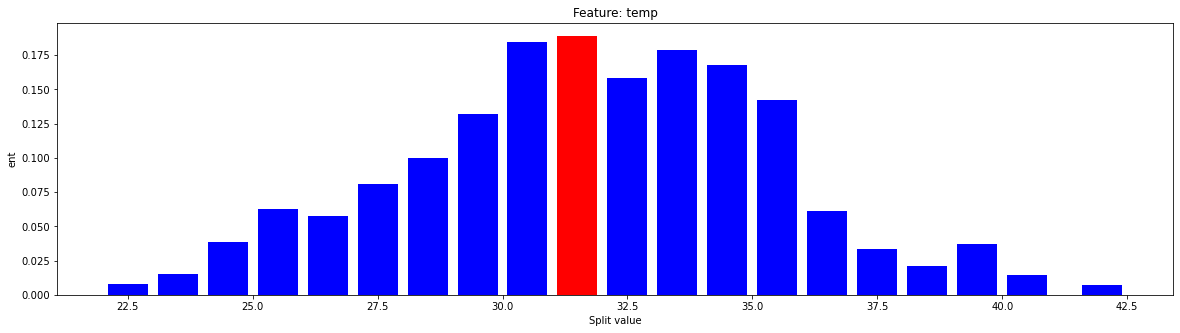

(0.18903722054370903, 31.5)

In [40]:
visualise_splits(Root.df,"temp","ent")

## visualise_best_feature()

__visualise_best_feature()__ allows users to plot all the information gain graphs for all features and compare the features visually.

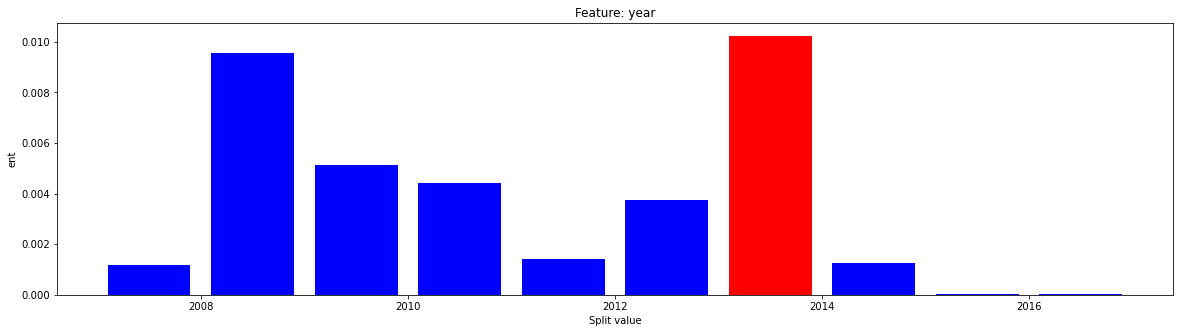

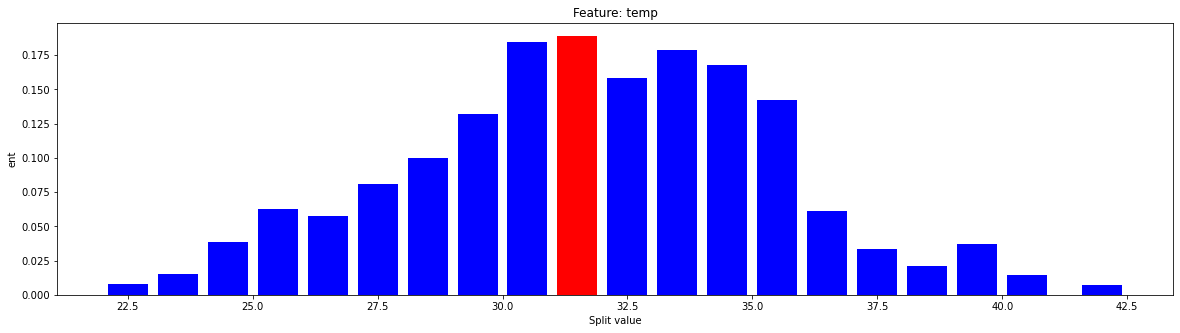

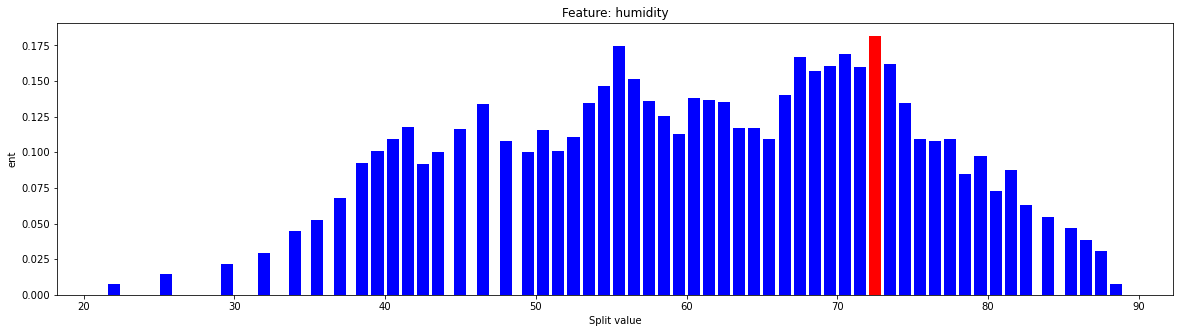

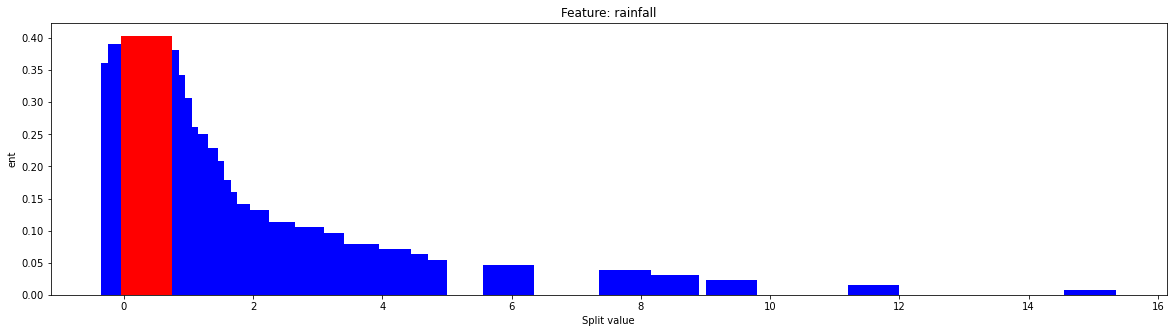

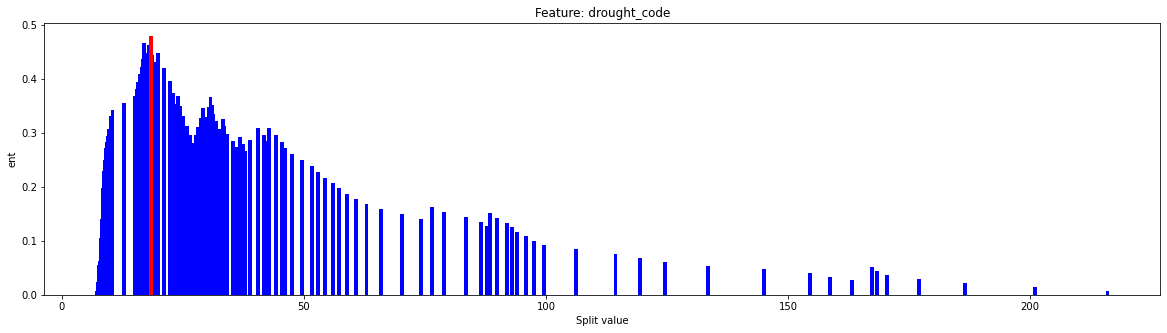

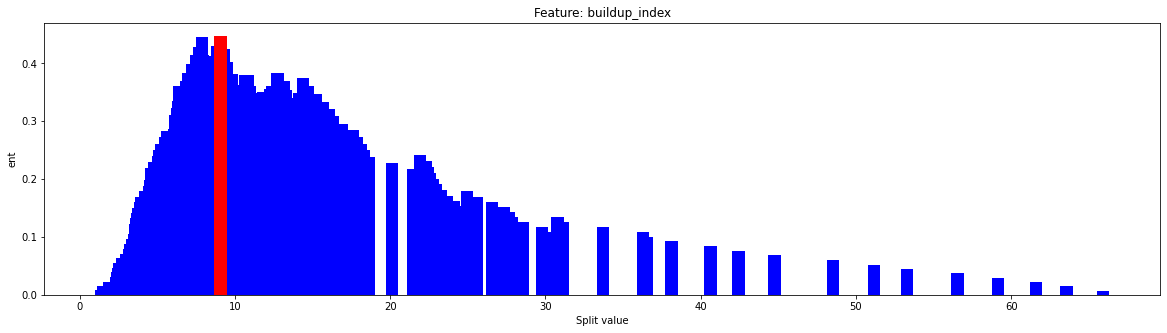

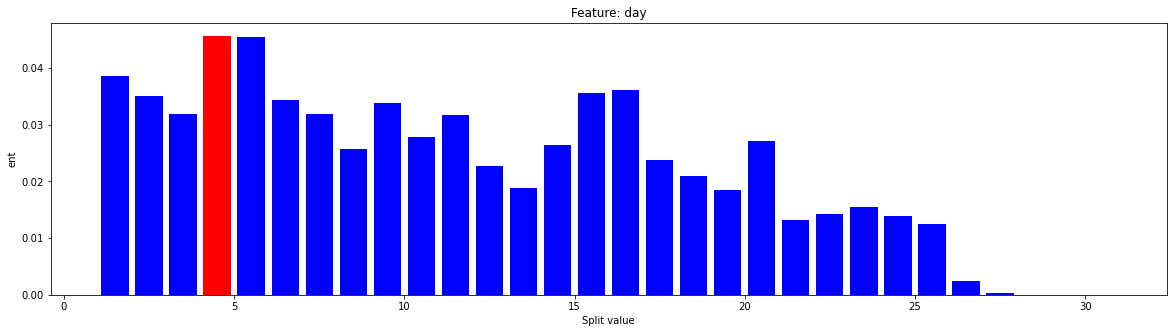

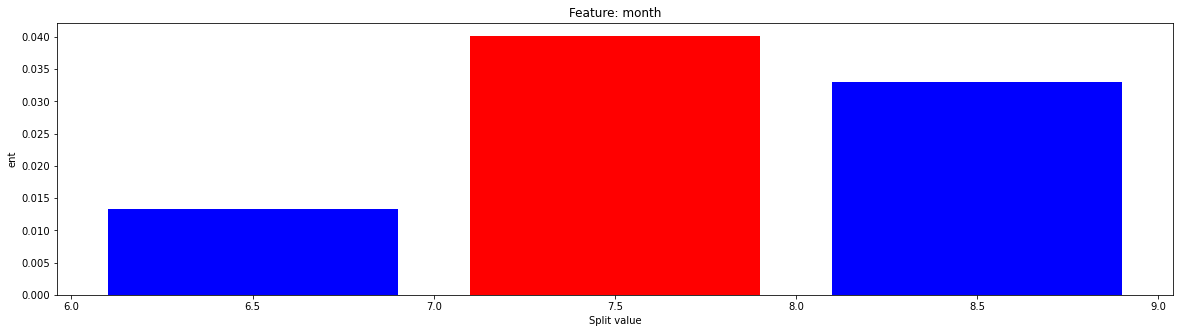

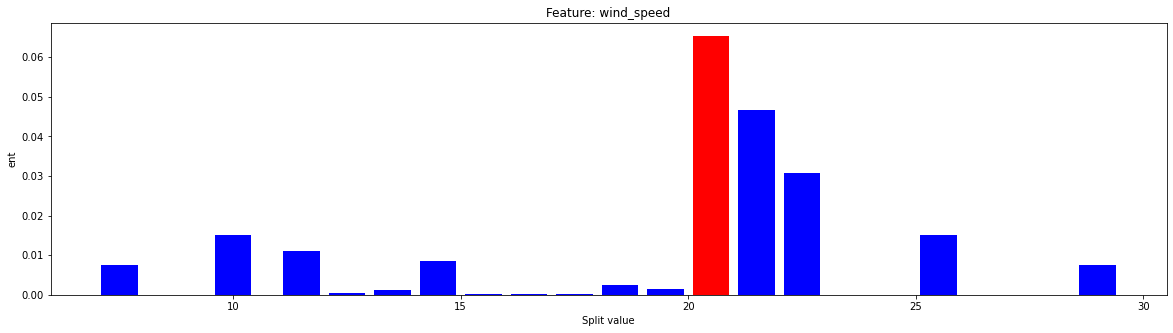

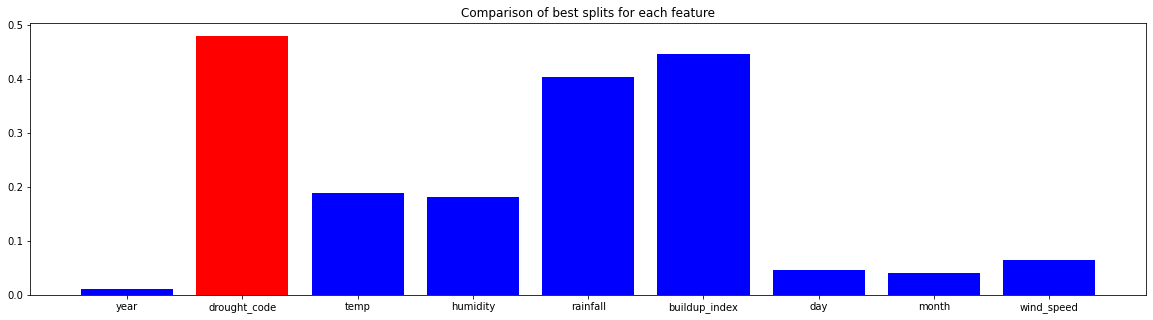

[((0.010229870295029198, 2013.5), 'year'), ((0.18903722054370903, 31.5), 'temp'), ((0.18165392587999984, 72.5), 'humidity'), ((0.40323875700838585, 0.35), 'rainfall'), ((0.4798096347881984, 18.4), 'drought_code'), ((0.44734971700679427, 9.065), 'buildup_index'), ((0.04567017773021653, 4.5), 'day'), ((0.04016227101712827, 7.5), 'month'), ((0.06533522129892833, 20.5), 'wind_speed')]


In [43]:
visualise_best_feature(Root.df,"ent")